# CHAPTER 7
## Ensemble Learning and Random Forests

A group of predictors is called an ensemble; This technique is called **Ensemble Learning** and this algorithm is called **Ensemble method**.

Different ensemble methods:
- Bagging
- Boosting
- Stacking


In [1]:
# create dataset 
from sklearn.datasets import make_moons

X_moons,y_moons = make_moons(n_samples=500,
                             noise=0.3,
                             random_state=42)

# spliting the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_moons,y_moons,test_size=0.2,train_size=0.8,random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
log_clf =LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [4]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.85
rf = 0.88
svc = 0.87


In [5]:
#lets look at accuracy of each classifiers
# from sklearn.metrics import accuracy_score
# for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

## Bagging Classifier

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators =500,
    max_samples = 100,bootstrap=True,n_jobs=-1, random_state=42) # bootstrap is true means sampling with replacement
bag_clf.fit(X_train,y_train)
y_pred1 = bag_clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9

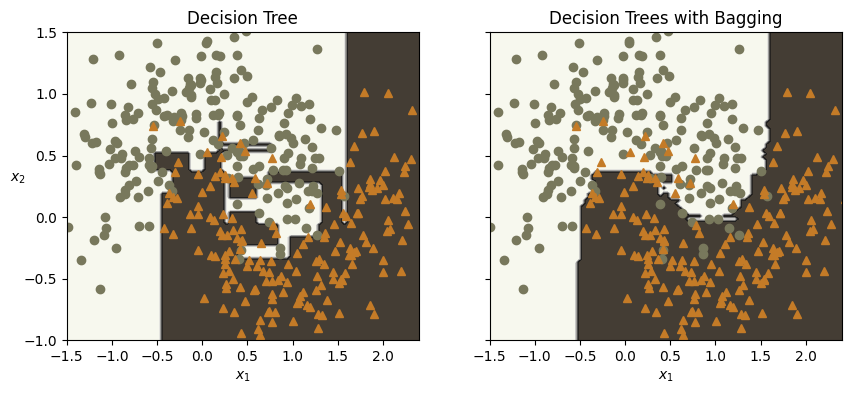

In [9]:
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf,X,y,alpha=1.0):
    axes=[-1.5,2.4,-1,1.5]
    x1,x2 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                        np.linspace(axes[2],axes[3],100) )
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1,x2,y_pred,alpha=0.3*alpha,cmap='Wistia')
    plt.contourf(x1,x2,y_pred,cmap='Greys',alpha=0.8*alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    bootstrap=True,oob_score=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [11]:
bag_clf.oob_score_

0.9125

In [12]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [13]:
bag_clf.oob_decision_function_[:3]

array([[1.      , 0.      ],
       [0.      , 1.      ],
       [0.046875, 0.953125]])

## Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(
    n_estimators=500, # no of trees
    max_leaf_nodes=16,# limiting to 16 nodes
    n_jobs=-1) # using all CPU Cores

rnd_clf.fit(X_train,y_train)

y_pred_rf = rnd_clf.predict(X_test)    

In [15]:
rnd_clf.feature_importances_

array([0.44106405, 0.55893595])

In [16]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
X_iris,y_iris = iris.data,iris.target
X_iris.shape,y_iris.shape

((150, 4), (150,))

In [20]:
rnd_clf_iris = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1)

In [21]:
rnd_clf_iris.fit(X_iris,y_iris)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [26]:
for name,score in zip(X_iris.columns,rnd_clf_iris.feature_importances_):
    print(f'{name}: {score}')

sepal length (cm): 0.10323261004067433
sepal width (cm): 0.02352357114489063
petal length (cm): 0.43018751595778976
petal width (cm): 0.44305630285664527
